# yolov5
version 3.1

author: nmc-costa

info: testing version 3.1


# Setup
Go to _tutorial.ipnb for full setup (like cloning the yolov5 repo, etc...)

In [27]:
import os
import sys
import platform
import torch
from IPython.display import Image, clear_output  # to display images


clear_output()

#Define root dir dependent on OS
rdir='D:/external_datasets/' 
if str(platform.platform()).find('linux')>-1: rdir='/mnt/d/external_datasets/' 
print('OS: {}'.format(platform.platform()))
print('root dir: {}'.format(rdir))
print("Python: " + sys.version)

#cuda 
#os.environ["CUDA_VISIBLE_DEVICES"]="" #force CPU
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

OS: Windows-10-10.0.20262-SP0
root dir: D:/external_datasets/
Python: 3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
Setup complete. Using torch 1.7.0 _CudaDeviceProperties(name='GeForce GTX 1070', major=6, minor=1, total_memory=8192MB, multi_processor_count=16)


## init vars

In [28]:
# DIRs [needed if you use %cd command multiple times or use the shell with different paths]
#script dir 
scriptdir=sys.path[0] #os.getcwd()
#yolov5 Dir
yolov5_dir=os.path.join(scriptdir, 'yolov5/')
print(yolov5_dir)
#json2yolo Dir
json2yolo_dir=os.path.join(scriptdir, 'json2yolo/')
print(json2yolo_dir)

#name of experiment
expname='mola128' #exp folder
project=rdir+'yolov5tests' #project folder 


C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\yolov5/
C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\json2yolo/


## 0. input data
#### Prepare the dataset for yolo format (CHECK OUT https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data ; https://medium.com/towards-artificial-intelligence/yolo-v5-is-here-custom-object-detection-tutorial-with-yolo-v5-12666ee1774e)

##### 1. Create labels and organize dataset in YOLO format (USE $JSON2YOLO$ folder)

Dataset Directory structure:
- dataset:
    - annotations:
        - samefoldername.json (WARNING: use 'train', 'val', 'test')
    - images:
        - samefoldername
    - labels:
        - samefoldername

Example :

dataset/images/train/000000109622.jpg  # image

dataset/labels/train/000000109622.txt  # label


In [3]:
source="mola"
copy_images="1" #1=copy images from original datasets, easiest way to create yolo format dataset # "0"= don't copy images use the ones from original #WARNING labels need to be organized » copy labels to the same root dir as "images" and also have the same path as the images - yolov5 only works with "images" folder, so in original dataset one needs to change to "images"  
datasets_root_dir=rdir
json_dir=rdir+'MOLA/annotations/split_mola_fix_equal/mix_aggressive/' #dont forget '/' because is folder
outdir=rdir+"MOLA/yoloformat/mola128/" #dont forget '/' because is folder
img_number=128

In [4]:
%cd $json2yolo_dir
!python json2yolo.py --source $source --datasets_root_dir $datasets_root_dir --json_dir $json_dir --outdir $outdir --copy_images $copy_images --img_number $img_number

C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\json2yolo

>>Namespace(copy_images=1, datasets_root_dir='D:/external_datasets/', img_number=128, json_dir='D:/external_datasets/MOLA/annotations/split_mola_fix_equal/mix_aggressive/', outdir='D:/external_datasets/MOLA/yoloformat/mola128/', source='mola')
missing : D:\external_datasets\COCO\2017\images\val2017\000000329219.jpg
118420_MISSING
missing : D:\external_datasets\COCO\2017\images\val2017\000000173371.jpg
120449_MISSING
missing : D:\external_datasets\COCO\2017\images\val2017\000000286182.jpg
119139_MISSING
missing : D:\external_datasets\COCO\2017\images\val2017\000000075393.jpg
120947_MISSING
missing : D:\external_datasets\COCO\2017\images\val2017\000000376322.jpg
122595_MISSING
missing : D:\external_datasets\COCO\2017\images\val2017\000000027696.jpg
119397_MISSING
missing : D:\external_datasets\COCO\2017\images\val2017\000000504711.jpg
118430_MISSING
missing : D:\external_datasets\COCO\201


Annotations D:/external_datasets/MOLA/annotations/split_mola_fix_equal/mix_aggressive\test.json:   0%|          | 0/133641 [00:00<?, ?it/s]
Annotations D:/external_datasets/MOLA/annotations/split_mola_fix_equal/mix_aggressive\test.json:   0%|          | 1/133641 [00:00<4:33:22,  8.15it/s]
Annotations D:/external_datasets/MOLA/annotations/split_mola_fix_equal/mix_aggressive\test.json:   0%|          | 3/133641 [00:00<3:54:18,  9.51it/s]
Annotations D:/external_datasets/MOLA/annotations/split_mola_fix_equal/mix_aggressive\test.json:   0%|          | 5/133641 [00:00<3:25:50, 10.82it/s]
Annotations D:/external_datasets/MOLA/annotations/split_mola_fix_equal/mix_aggressive\test.json:   0%|          | 7/133641 [00:00<3:09:56, 11.73it/s]
Annotations D:/external_datasets/MOLA/annotations/split_mola_fix_equal/mix_aggressive\test.json:   0%|          | 10/133641 [00:00<2:44:02, 13.58it/s]
Annotations D:/external_datasets/MOLA/annotations/split_mola_fix_equal/mix_aggressive\test.json:   0%|      


119668_MISSING
missing : D:\external_datasets\TAO\TAO_DIR\frames\val\YFCC100M\v_f98739249efe1830f81eb02e6d756d15\frame0361.jpeg
155258_MISSING
missing : D:\external_datasets\COCO\2017\images\val2017\000000173371.jpg
120449_MISSING
missing : D:\external_datasets\COCO\2017\images\val2017\000000170670.jpg
121682_MISSING
missing : D:\external_datasets\COCO\2017\images\val2017\000000483999.jpg
119801_MISSING
missing : D:\external_datasets\TAO\TAO_DIR\frames\val\YFCC100M\v_f98739249efe1830f81eb02e6d756d15\frame0871.jpeg
155275_MISSING
missing : D:\external_datasets\COCO\2017\images\val2017\000000377946.jpg
121921_MISSING
missing : D:\external_datasets\COCO\2017\images\val2017\000000177213.jpg
122809_MISSING



Annotations D:/external_datasets/MOLA/annotations/split_mola_fix_equal/mix_aggressive\val.json:   0%|          | 7/267463 [00:00<4:26:33, 16.72it/s]
Annotations D:/external_datasets/MOLA/annotations/split_mola_fix_equal/mix_aggressive\val.json:   0%|          | 10/267463 [00:00<4:07:27, 18.01it/s]
Annotations D:/external_datasets/MOLA/annotations/split_mola_fix_equal/mix_aggressive\val.json:   0%|          | 12/267463 [00:00<4:20:41, 17.10it/s]
Annotations D:/external_datasets/MOLA/annotations/split_mola_fix_equal/mix_aggressive\val.json:   0%|          | 14/267463 [00:00<4:20:57, 17.08it/s]
Annotations D:/external_datasets/MOLA/annotations/split_mola_fix_equal/mix_aggressive\val.json:   0%|          | 17/267463 [00:00<4:07:30, 18.01it/s]
Annotations D:/external_datasets/MOLA/annotations/split_mola_fix_equal/mix_aggressive\val.json:   0%|          | 19/267463 [00:01<4:00:26, 18.54it/s]
Annotations D:/external_datasets/MOLA/annotations/split_mola_fix_equal/mix_aggressive\val.json:   0%

##### 2. create dataset .yaml file (like coco_external)

Yolov5 algorithm parses yaml information: path to dataset(train, validation and test) in YOLO (darknet) format (see below); number of classes and classes names

In [29]:
#YAML Paths # use different yamls
datasetyaml=os.path.join(scriptdir, 'mola128_external.yaml')

##### 3. Select a Model(yolov5s, yolov5x, ...) and update the number of classes to match the dataset

Go to $./models$ folder and copy model .yaml file tho this directory and change the $nc: $ parameter

In [30]:
#YAML Paths # use different models
modelyaml=os.path.join(scriptdir, 'mola128_yolov5s.yaml')

## 1. Train
Run the training command below to train for X epochs. 

EXAMPLE: You can train YOLOv5s from scratch by passing `--cfg yolov5s.yaml --weights ''`, or train from a pretrained checkpoint by passing a matching weights file: `--cfg yolov5s.yaml --weights yolov5s.pt`.

Train function retrains the model with the new 'train' data and tests the model against the 'val' data

All training results are saved to runs/exp0 for the first experiment, then runs/exp1, runs/exp2 etc. for subsequent experiments.

In [41]:
#exp name
t_name=os.path.join(expname,'train')
t_name

'mola128\\train'

In [32]:
# Clear any logs from previous runs
#BUG WINDOWS runs/exp0 don't iterates to exp1,exp2,...
logdir=os.path.join(project,t_name)
!rm -rfv $logdir

In [34]:
# Start tensorboard (optional)
#BUG WINDOWS are not able to log information
#%cd $yolov5_dir

%load_ext tensorboard
%reload_ext tensorboard
%tensorboard --logdir $logdir

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 6068), started 0:00:07 ago. (Use '!kill 6068' to kill it.)

In [35]:
# Train Models from scractch 
#(#WARNING: if using --cache parameter you need to be careful: in yolov5.utils.datasets gives keyerror; #SOLUTION delete cache in dataset folder or don't use --cache)
%cd $yolov5_dir
#!pwd
# !ls
!python train.py --name $t_name --project $project --img 640 --batch 8 --epochs 3 --data $datasetyaml --cfg $modelyaml --weights yolov5s.pt

C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\yolov5


Analyzing anchors... anchors/target = 4.39, Best Possible Recall (BPR) = 0.9847
                 all         128         136           0           0    0.000615    0.000131
                 all         128         136           0           0     0.00121    0.000248
                 all         128         136           0           0     0.00123    0.000242


Using torch 1.7.0 CUDA:0 (GeForce GTX 1070, 8192MB)

Namespace(adam=False, batch_size=8, bucket='', cache_images=False, cfg='C:\\Users\\nmc_costa\\google_drive\\projects\\bosch_P19\\research\\python_ws\\violent_action\\yolo\\mola128_yolov5s.yaml', data='C:\\Users\\nmc_costa\\google_drive\\projects\\bosch_P19\\research\\python_ws\\violent_action\\yolo\\mola128_external.yaml', device='', epochs=3, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], local_rank=-1, log_imgs=16, multi_scale=False, name='mola128\\train', noautoanchor=False, nosave=False, notest=False, project='D:/external_datasets/yolov5tests', rect=False, resume=False, save_dir='D:\\external_datasets\\yolov5tests\\mola128\\train', single_cls=False, sync_bn=False, total_batch_size=8, weights='yolov5s.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir D:/external_datasets/yolov5tests", view at http://localhost:6006/
Hyperparameters {'lr0'

Optimizer stripped from D:\external_datasets\yolov5tests\mola128\train\weights\last.pt, 14.8MB
Optimizer stripped from D:\external_datasets\yolov5tests\mola128\train\weights\best.pt, 14.8MB



  8                -1  1    656896  models.common.SPP                       [512, 512, [5, 9, 13]]        
  9                -1  1   1248768  models.common.BottleneckCSP             [512, 512, 1, False]          
 10                -1  1    131584  models.common.Conv                      [512, 256, 1, 1]              
 11                -1  1         0  torch.nn.modules.upsampling.Upsample    [None, 2, 'nearest']          
 12           [-1, 6]  1         0  models.common.Concat                    [1]                           
 13                -1  1    378624  models.common.BottleneckCSP             [512, 256, 1, False]          
 14                -1  1     33024  models.common.Conv                      [256, 128, 1, 1]              
 15                -1  1         0  torch.nn.modules.upsampling.Upsample    [None, 2, 'nearest']          
 16           [-1, 4]  1         0  models.common.Concat                    [1]                           
 17                -1  1     95104  m

## 2. Output data (Visualize)

## Weights & Biases Logging 🌟 NEW

During training you will see live updates at [https://www.wandb.com/](https://www.wandb.com/), and you can create and share detailed [Reports](https://wandb.ai/glenn-jocher/yolov5_tutorial/reports/YOLOv5-COCO128-Tutorial-Results--VmlldzozMDI5OTY) of your results. For more information see the [YOLOv5 Weights & Biases Tutorial](https://github.com/ultralytics/yolov5/issues/1289). 

View runs/exp0/train*.jpg images to see training images, labels and augmentation effects. A Mosaic Dataloader is used for training (shown below), a new concept developed by Ultralytics and first featured in YOLOv4. If your labels are not correct in these images then you have incorrectly labelled your data, and should revisit 2. Create Labels.

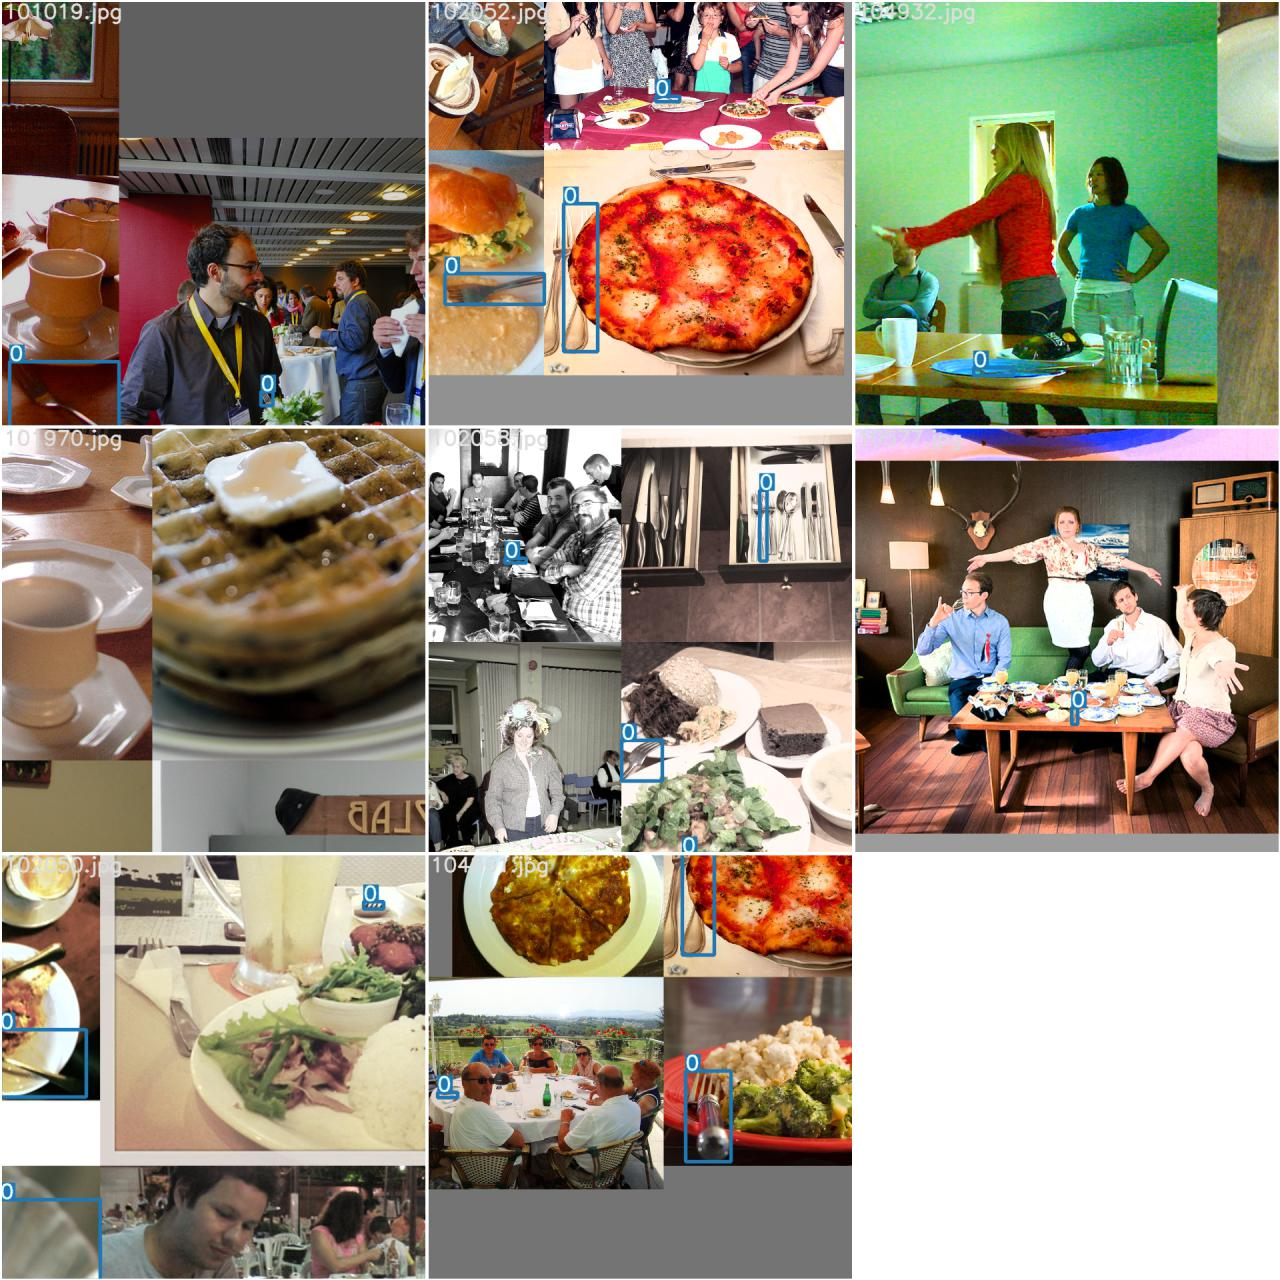

In [36]:
Image(filename=os.path.join(project,t_name,'train_batch0.jpg'), width=900)

## 3. Inference (detect)

In [45]:
#project
weights=os.path.join(project,t_name,'weights/best.pt')
source=rdir+'mola_samples/VIDEOS'
d_name=os.path.join(expname,'detect')
d_name


'mola128\\detect'

In [46]:
%cd $yolov5_dir
!python detect.py --name $d_name --project $project --source $source --weights $weights --conf 0.4 --augment 

C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\yolov5
Namespace(agnostic_nms=False, augment=True, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='mola128\\detect', project='D:/external_datasets/yolov5tests', save_conf=False, save_txt=False, source='D:/external_datasets/mola_samples/VIDEOS', update=False, view_img=False, weights=['D:/external_datasets/yolov5tests\\mola128\\train\\weights/best.pt'])
Fusing layers... 
video 1/9 (1/53) D:\external_datasets\mola_samples\VIDEOS\VID_20200903_112019.mp4: 384x640 Done. (0.030s)
video 1/9 (2/53) D:\external_datasets\mola_samples\VIDEOS\VID_20200903_112019.mp4: 384x640 Done. (0.029s)
video 1/9 (3/53) D:\external_datasets\mola_samples\VIDEOS\VID_20200903_112019.mp4: 384x640 Done. (0.029s)
video 1/9 (4/53) D:\external_datasets\mola_samples\VIDEOS\VID_20200903_112019.mp4: 384x640 Done. (0.029s)
video 1/9 (5/53) D:\external_datasets\mola_samples\VIDEOS\VID_2020090

Using torch 1.7.0 CUDA:0 (GeForce GTX 1070, 8192MB)

Model Summary: 232 layers, 7249215 parameters, 0 gradients


video 1/9 (26/53) D:\external_datasets\mola_samples\VIDEOS\VID_20200903_112019.mp4: 384x640 Done. (0.027s)
video 1/9 (27/53) D:\external_datasets\mola_samples\VIDEOS\VID_20200903_112019.mp4: 384x640 Done. (0.031s)
video 1/9 (28/53) D:\external_datasets\mola_samples\VIDEOS\VID_20200903_112019.mp4: 384x640 Done. (0.027s)
video 1/9 (29/53) D:\external_datasets\mola_samples\VIDEOS\VID_20200903_112019.mp4: 384x640 Done. (0.030s)
video 1/9 (30/53) D:\external_datasets\mola_samples\VIDEOS\VID_20200903_112019.mp4: 384x640 Done. (0.028s)
video 1/9 (31/53) D:\external_datasets\mola_samples\VIDEOS\VID_20200903_112019.mp4: 384x640 Done. (0.028s)
video 1/9 (32/53) D:\external_datasets\mola_samples\VIDEOS\VID_20200903_112019.mp4: 384x640 Done. (0.031s)
video 1/9 (33/53) D:\external_datasets\mola_samples\VIDEOS\VID_20200903_112019.mp4: 384x640 Done. (0.028s)
video 1/9 (34/53) D:\external_datasets\mola_samples\VIDEOS\VID_20200903_112019.mp4: 384x640 Done. (0.027s)
video 1/9 (35/53) D:\external_dataset

In [50]:
from IPython.display import Video
filename=os.path.join(project,d_name,'VID_20200903_112019.mp4')
filename
Video(filename)

## 4. (Re-) Test/validate

(Re-) Test a model on dataset to determine trained accuracy (WARNING : Train already does this). Models are auto-downloaded from Google Drive. To show results by class use the --verbose flag.

In [51]:
#project
weights=os.path.join(project,t_name,'weights/best.pt')
source=rdir+'mola_samples/VIDEOS'
tt_name=os.path.join(expname,'test')
tt_name

'mola128\\test'

In [55]:
# SHELL Ipython: Run YOLOv5x on COCO validation images
%cd $yolov5_dir
#!pwd
#!ls
!python test.py --name $tt_name --project $project --weights $weights --data $datasetyaml --task 'val' --img 640 --verbose --device 0

C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\yolov5
Namespace(augment=False, batch_size=32, conf_thres=0.001, data='C:\\Users\\nmc_costa\\google_drive\\projects\\bosch_P19\\research\\python_ws\\violent_action\\yolo\\mola128_external.yaml', device='0', exist_ok=False, img_size=640, iou_thres=0.65, name='mola128\\test', project='D:/external_datasets/yolov5tests', save_conf=False, save_json=False, save_txt=False, single_cls=False, task="'val'", verbose=True, weights=['D:/external_datasets/yolov5tests\\mola128\\train\\weights/best.pt'])
